In [2]:
%matplotlib inline

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

import gymnasium as gym
from gymnasium import spaces

import time

In [4]:
pd.read_csv('data/raw/d_2024_07_01.dat', encoding='Windows-1252')

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 9148: character maps to <undefined>

In [13]:
with open('data/raw/00444174.dat', 'r', encoding='Windows-1252') as f:
    data = f.readlines()

In [27]:
data[:5]

['ACK\n',
 '$GPGGA,000107.00,2102.4915,N,07357.8063,W,1,09,0.8,27.2,M,-38.0,M,,*6B#1$VDVBW,14.72,,A,,,V,,V,,V*68#2$VDDPT,,,400*4A#2$SDDPT,0002.1,+09.0,0050*5F#4$GPDTM,W84,,00.0000,N,00.0000,E,,W84*41#1$IIVHW,358.9,T,,M,,N,,K*7C#3$PSKPDPT,0002.1,+09.0,0050,2,02,*4C#4$GPGLL,2102.4915,N,07357.8063,W,000107.00,A,A*7E#1$GPVTG,359.6,T,9.7,M,15.196,N,28.143,K,A*22#1$HEHDT,358.9,T*28#3$SDDPT,0002.1,+09.0,0050*5F#4$GPDTM,W84,,00.0000,N,00.0000,E,,W84*41#1$PSKPDPT,0002.1,+09.0,0050,2,02,*4C#4$HEROT,-000.9,A*0F#3$GPRMC,000108.00,A,2102.4956,N,07357.8063,W,15.2,359.6,010724,10.1,W,A,S*48#1$GPDTM,W84,,00.0000,N,00.0000,E,,W84*41#1$HCHDT,,T*07#3$SDDPT,0002.1,+09.0,0050*5F#4$GPZDA,000109.00,01,07,2024,00,00*6C#1$PSKPDPT,0002.1,+09.0,0050,2,02,*4C#4$GPDTM,W84,,00.0000,N,00.0000,E,,W84*41#1$WIMWV,89.0,R,23.0,N,A*23#5$PASVW,15.2,A*1A#3$GPGGA,000108.00,2102.4956,N,07357.8063,W,1,08,1.0,27.8,M,-38.0,M,,*61#1$VDVBW,14.72,,A,,,V,,V,,V*68#2$VDDPT,,,400*4A#2$SDDPT,0002.1,+09.0,0050*5F#4$GPDTM,W84,,00.0000,N,0

In [25]:
with open('data/raw/01BB6174.dat', 'r', encoding='Windows-1252') as f:
    data2 = f.readlines()

In [26]:
data2[1]

'$SDDPT,0001.8,+09.0,0050*55#4$VDVBW,14.63,,A,,,V,,V,,V*68#2$PASVW,15.0,A*18#3$GPGGA,000708.00,2104.0034,N,07357.8066,W,1,10,0.8,30.0,M,-38.0,M,,*63#1$VDDPT,,,400*4A#2$PSKPDPT,0001.8,+09.0,0050,3,02,*47#4$GPDTM,W84,,00.0000,N,00.0000,E,,W84*41#1$GPGLL,2104.0034,N,07357.8066,W,000708.00,A,A*7A#1$IIVHW,358.8,T,,M,,N,,K*7D#3$SDDPT,0001.8,+09.0,0050*55#4$WIMWV,87.0,R,23.9,N,A*24#5$PSKPDPT,0001.8,+09.0,0050,4,02,*40#4$GPVTG,0.0,T,10.1,M,15.036,N,27.847,K,A*1C#1$HEHDT,358.8,T*29#3$GPDTM,W84,,00.0000,N,00.0000,E,,W84*41#1$HEROT,001.2,A*28#3$SDDPT,0001.8,+09.0,0050*55#4$GPRMC,000709.00,A,2104.0076,N,07357.8066,W,15.0,0.0,010724,10.1,W,A,S*48#1$PSKPDPT,0001.8,+09.0,0050,4,02,*40#4$GPDTM,W84,,00.0000,N,00.0000,E,,W84*41#1$HCHDT,,T*07#3$GPZDA,000710.00,01,07,2024,00,00*62#1$GPDTM,W84,,00.0000,N,00.0000,E,,W84*41#1$SDDPT,0001.8,+09.0,0050*55#4$PSKPDPT,0001.8,+09.0,0050,4,02,*40#4$PASVW,15.0,A*18#3$VDVBW,14.62,,A,,,V,,V,,V*69#2$VDDPT,,,400*4A#2$GPGGA,000709.00,2104.0076,N,07357.8066,W,1,10,0.8,29.5

In [49]:
with open('data/raw/d_2024_07_01.dat', 'r', errors='replace') as f:
    data = []
    for i in range(100):
        data.append(f.readline())

In [62]:
data[10:20]

['\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00c>‚ÿ?4æ@\x1f2#$SDDPT,0002.1,+09.0,0050*5F\n',
 'N,07357.8051,W,15.2,359.6,300624,10.1,W,A,S*41\n',
 '\x00\x00\x00\x00\x00\x00\x00\x00\

In [94]:
def is_valid_nmea(sentence):
    # Basic check to see if it's a valid NMEA sentence (starts with $ and has a checksum *)
    return sentence.startswith('$') and '*' in sentence


def reg_match(line):
    pattern = r'\$(.*?)\*'
    matches = re.findall(pattern, line)

    return matches

def extract_valid_nmea_lines(file_path):
    valid_lines = []
    with open(file_path, 'r', errors='replace') as f:
        for line in f:
            line = line.strip()  # Remove any leading/trailing spaces or newlines
            matches = reg_match(line)
            if matches:
                if len(valid_lines) > 0 and valid_lines[-1] == matches[0]:
                    continue
                if 'GPRMC' in matches[0]:
                    valid_lines.append(matches[0])
    return valid_lines

file_path = 'data/raw/d_2024_07_01.dat'
valid_nmea_lines = extract_valid_nmea_lines(file_path)

In [95]:
valid_nmea_lines[:200]

['GPRMC,235958.00,A,2102.2018,N,07357.8043,W,15.2,359.6,300624,10.1,W,A,S',
 'GPRMC,235959.00,A,2102.2060,N,07357.8043,W,15.2,359.6,300624,10.1,W,A,S',
 'GPRMC,000000.00,A,2102.2102,N,07357.8043,W,15.2,359.7,010724,10.1,W,A,S',
 'GPRMC,000001.00,A,2102.2144,N,07357.8044,W,15.2,359.6,010724,10.1,W,A,S',
 'GPRMC,000002.00,A,2102.2187,N,07357.8044,W,15.2,359.6,010724,10.1,W,A,S',
 'GPRMC,000003.00,A,2102.2229,N,07357.8045,W,15.2,359.6,010724,10.1,W,A,S',
 'GPRMC,000004.00,A,2102.2271,N,07357.8046,W,15.2,359.5,010724,10.1,W,A,S',
 'GPRMC,000005.00,A,2102.2313,N,07357.8046,W,15.2,359.5,010724,10.1,W,A,S',
 'GPRMC,000006.00,A,2102.2355,N,07357.8047,W,15.2,359.5,010724,10.1,W,A,S',
 'GPRMC,000007.00,A,2102.2397,N,07357.8047,W,15.2,359.4,010724,10.1,W,A,S',
 'GPRMC,000008.00,A,2102.2438,N,07357.8048,W,15.2,359.4,010724,10.1,W,A,S',
 'GPRMC,000009.00,A,2102.2480,N,07357.8048,W,15.2,359.3,010724,10.1,W,A,S',
 'GPRMC,000010.00,A,2102.2522,N,07357.8047,W,15.2,359.3,010724,10.1,W,A,S',
 'GPRMC,0000

In [85]:
# Function to extract time and sensor data
def parse_data(row):
    # Regex to extract the time component from sensor data (GPRMC, GPGGA etc.)
    time_pattern = re.compile(r'\d{6}\.\d{2}')
    
    for entry in row:
        time_match = time_pattern.search(entry)
        if time_match:
            time_str = time_match.group()
            # Convert time to hh:mm:ss
            time = f"{time_str[:2]}:{time_str[2:4]}:{time_str[4:6]}"
            sensor_type, sensor_data = entry.split(',', 1)
            return time, sensor_type, sensor_data
    
    return None, None, None

# Initialize an empty dictionary for the table
sensor_table = {}

# Process each row of the data
for row in valid_nmea_lines:
    time, sensor_type, sensor_data = parse_data(row)
    
    if time and sensor_type:
        if time not in sensor_table:
            sensor_table[time] = {}
        # Add the sensor data to the appropriate time row
        sensor_table[time][sensor_type] = sensor_data

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame.from_dict(sensor_table, orient='index')

# Show the DataFrame
print(df)


MemoryError: Unable to allocate 11.3 GiB for an array with shape (17565, 86550) and data type object

In [70]:
with open('data/raw/00444174.dat', 'r', errors='replace') as f:
    data = []
    for i in range(100):
        data.append(f.readline())

In [82]:
data[:20]

['ACK\n',
 '$GPGGA,000107.00,2102.4915,N,07357.8063,W,1,09,0.8,27.2,M,-38.0,M,,*6B#1$VDVBW,14.72,,A,,,V,,V,,V*68#2$VDDPT,,,400*4A#2$SDDPT,0002.1,+09.0,0050*5F#4$GPDTM,W84,,00.0000,N,00.0000,E,,W84*41#1$IIVHW,358.9,T,,M,,N,,K*7C#3$PSKPDPT,0002.1,+09.0,0050,2,02,*4C#4$GPGLL,2102.4915,N,07357.8063,W,000107.00,A,A*7E#1$GPVTG,359.6,T,9.7,M,15.196,N,28.143,K,A*22#1$HEHDT,358.9,T*28#3$SDDPT,0002.1,+09.0,0050*5F#4$GPDTM,W84,,00.0000,N,00.0000,E,,W84*41#1$PSKPDPT,0002.1,+09.0,0050,2,02,*4C#4$HEROT,-000.9,A*0F#3$GPRMC,000108.00,A,2102.4956,N,07357.8063,W,15.2,359.6,010724,10.1,W,A,S*48#1$GPDTM,W84,,00.0000,N,00.0000,E,,W84*41#1$HCHDT,,T*07#3$SDDPT,0002.1,+09.0,0050*5F#4$GPZDA,000109.00,01,07,2024,00,00*6C#1$PSKPDPT,0002.1,+09.0,0050,2,02,*4C#4$GPDTM,W84,,00.0000,N,00.0000,E,,W84*41#1$WIMWV,89.0,R,23.0,N,A*23#5$PASVW,15.2,A*1A#3$GPGGA,000108.00,2102.4956,N,07357.8063,W,1,08,1.0,27.8,M,-38.0,M,,*61#1$VDVBW,14.72,,A,,,V,,V,,V*68#2$VDDPT,,,400*4A#2$SDDPT,0002.1,+09.0,0050*5F#4$GPDTM,W84,,00.0000,N,0

In [83]:
data[20:40]

['$GPDTM,W84,,00.0000,N,00.0000,E,,W84*41#1$GPZDA,000138.00,01,07,2024,00,00*6E#1$HCHDT,,T*07#3$SDDPT,0002.1,+09.0,0050*5F#4$GPDTM,W84,,00.0000,N,00.0000,E,,W84*41#1$PSKPDPT,0002.1,+09.0,0050,4,02,*4A#4$GPGLL,2102.6181,N,07357.8067,W,000137.00,A,A*7E#1$WIMWV,92.0,R,20.8,N,A*22#5$VDVBW,14.60,,A,,,V,,V,,V*6B#2$PASVW,15.2,A*1A#3$GPDTM,W84,,00.0000,N,00.0000,E,,W84*41#1$VDDPT,,,400*4A#2$SDDPT,0002.1,+09.0,0050*5F#4$GPGGA,000137.00,2102.6181,N,07357.8067,W,1,09,1.0,21.3,M,-38.0,M,,*65#1$PSKPDPT,0002.1,+09.0,0050,4,02,*4A#4$IIVHW,358.9,T,,M,,N,,K*7C#3$GPVTG,359.7,T,9.8,M,15.164,N,28.084,K,A*2B#1$HEHDT,358.9,T*28#3$GPDTM,W84,,00.0000,N,00.0000,E,,W84*41#1$SDDPT,0002.1,+09.0,0050*5F#4$PSKPDPT,0002.1,+09.0,0050,3,02,*4D#4$GPRMC,000138.00,A,2102.6224,N,07357.8067,W,15.2,359.7,010724,10.1,W,A,S*42#1$HEROT,000.5,A*2E#3$GPDTM,W84,,00.0000,N,00.0000,E,,W84*41#1$GPZDA,000139.00,01,07,2024,00,00*6F#1$VDVLW,5302.28,N,773.64,N*60#2$HCHDT,,T*07#3$GPDTM,W84,,00.0000,N,00.0000,E,,W84*41#1$SDDPT,0002.1,+09.

In [103]:
log = pd.read_csv('data/raw/LOG 30.CSV', encoding='Windows-1252')

In [104]:
log['Target Name'].value_counts()

Target Name
RCC AFRICA    7054
Name: count, dtype: int64

In [105]:
log['Type'].value_counts()

Type
ENC Data        6009
Ship Log        1029
New Alert          8
End Of Alert       6
Local ACK.         1
Removed            1
AIS Message        1
Name: count, dtype: int64

In [110]:
log[log['Type'] == 'ENC Data']['Message']

0       Database: CAES, Cell: GB21021A.C00, Agency: GB...
1       Database: CAES, Cell: GB21021A.C00, Agency: GB...
3       Database: CAES, Cell: GB21021A.C00, Agency: GB...
4       Database: CAES, Cell: GB21021A.C00, Agency: GB...
6       Database: CAES, Cell: GB21021A.C00, Agency: GB...
                              ...                        
7050    Database: CAES, Cell: MX208087.C00, Agency: MX...
7051    Database: CAES, Cell: MX208087.C00, Agency: MX...
7052    Database: CAES, Cell: MX208087.C00, Agency: MX...
7053    Database: CAES, Cell: MX208087.C00, Agency: MX...
7054    Database: CAES, Cell: MX208087.C00, Agency: MX...
Name: Message, Length: 6009, dtype: object

In [271]:
log = pd.read_csv('data/raw/LOG current.CSV', encoding='Windows-1252')

In [272]:
log

,Date,Time,MMSI,Target Name,Type,Message
0,30-Sep-24,00:00:23,311594000,RCC AFRICA,Ship Log,Manual Position Fix Added: 09°34.091'N 086°...
1,30-Sep-24,00:00:55,311594000,RCC AFRICA,Ship Log,"POS: 09° 34.156' N, 086° 30.822' W, SOG: 14.4 ..."
2,30-Sep-24,00:02:04,311594000,RCC AFRICA,Ship Log,"POS: 09° 34.290' N, 086° 31.066' W, SOG: 14.3 ..."
3,30-Sep-24,00:03:12,311594000,RCC AFRICA,Ship Log,"POS: 09° 34.422' N, 086° 31.306' W, SOG: 14.3 ..."
4,30-Sep-24,00:04:21,311594000,RCC AFRICA,Ship Log,"POS: 09° 34.555' N, 086° 31.552' W, SOG: 14.4 ..."
...,...,...,...,...,...,...
815,30-Sep-24,17:04:01,311594000,RCC AFRICA,Ship Log,"POS: 11° 26.873' N, 090° 23.952' W, SOG: 18.3 ..."
816,30-Sep-24,17:05:10,311594000,RCC AFRICA,Ship Log,"POS: 11° 27.038' N, 090° 24.264' W, SOG: 18.1 ..."
817,30-Sep-24,17:06:19,311594000,RCC AFRICA,Ship Log,"POS: 11° 27.199' N, 090° 24.576' W, SOG: 18.0 ..."
818,30-Sep-24,17:07:29,311594000,RCC AFRICA,Ship Log,"POS: 11° 27.361' N, 090° 24.887' W, SOG: 18.1 ..."


In [273]:
log = log.drop(columns=['MMSI', 'Type', 'Target Name'])

In [274]:
log.columns = ['date', 'time', 'msg']

In [275]:
log.loc[0, 'msg']

" Manual Position Fix Added:  09°34.091'N  086°30.701'W"

In [276]:
log[log.msg == " Manual Position Fix Added:  09°34.091'N  086°30.701'W"]

,date,time,msg
0,30-Sep-24,00:00:23,Manual Position Fix Added: 09°34.091'N 086°...


In [277]:
'Manual' in log.msg.str.strip()

False

In [278]:
log = log[~log['msg'].str.contains('Manual', case=False, na=False)]

In [279]:
log = log.reset_index(drop=True)

In [281]:
line = log.msg[0]

In [282]:
line = line.split(', ')

In [283]:
for i in range(len(line)):
    print(f'{i} - {line[i]}')

0 - POS: 09° 34.156' N
1 - 086° 30.822' W
2 - SOG: 14.4 kn
3 - COG: 299.3°
4 - HDG: 295.0° 
5 - WND: 355.0°
6 - 20.7 kn


In [284]:
lat = line[0].split(': ')[1]
lon = line[1]
sog = line[2].split(': ')[1].split(' ')[0]
cog = line[3].split(': ')[1][:-1]
hdg = line[4].split(': ')[1].strip()[:-1]
wnd_dir = line[5].split(': ')[1][:-1]
wnd_spd = line[6].split(' ')[0]

In [285]:
deg, min, dir = lat.split(' ')

In [286]:
deg = deg[:-1]

In [287]:
min = min[:-1]

In [288]:
min

'34.156'

In [289]:
float(deg)

9.0

In [344]:
def extract_data_from_msg(line):
    try:
        line = line.split(', ')
        
        lat = line[0].split(': ')[1]
        lon = line[1]
        sog = line[2].split(': ')[1].split(' ')[0]
        cog = line[3].split(': ')[1][:-1]
        hdg = line[4].split(': ')[1].strip()[:-1]
        wnd_dir = line[5].split(': ')[1][:-1]
        wnd_spd = line[6].split(' ')[0]
    
        lat = convert_coordinates(lat)
        lon = convert_coordinates(lon)
    except IndexError:
        print(line)
        return [None] * 7

    return lat, lon, sog, cog, hdg, wnd_dir, wnd_spd

def convert_coordinates(coordinates):
    deg, min, dir = coordinates.split(' ')
    deg = deg[:-1]
    min = min[:-1]

    if dir == 'N' or dir == 'E':
        dir = 1
    else:
        dir = -1
    
    return np.round((float(deg) + float(min) / 60) * dir, 4)    

def drop_rows(df, msgs=['Manual', 'System', 'Total']):
    for msg in msgs:
        df = df[~df['msg'].str.contains(msg, case=False, na=False)]
    return df

def drop_columns(df, columns=['MMSI', 'Type', 'Target Name']):
    return df.drop(columns=columns)

def rename_columns(df, names=['date', 'time', 'msg']):
    df.columns = names
    return df

def clean_ship_log(path):
    df = pd.read_csv(path, encoding='Windows-1252')
    df = drop_columns(df)
    df = rename_columns(df)
    df = drop_rows(df)
    df[['lat', 'lon', 'sog', 'cog', 'hdg', 'wnd_dir', 'wnd_spd']] = df.msg.apply(lambda x: pd.Series(extract_data_from_msg(x)))
    df.date = pd.to_datetime(df.date)
    df.time = pd.to_datetime(df.time, format='%H:%M:%S').dt.time
    df = df.reset_index(drop=True)
    df = drop_columns(df, 'msg')
    return df
    

In [291]:
line_2 = log.msg[1]

In [292]:
print(extract_data_from_msg(line_2))

(9.5715, -86.5178, '14.3', '298.0', '294.9', '354.0', '20.6')


In [299]:
log_50 = log[:50]

In [300]:
log_50.loc[:, ['lat', 'lon', 'sog', 'cog', 'hdg', 'wnd_dir', 'wnd_spd']] = log_50.msg.apply(lambda x: pd.Series(extract_data_from_msg(x)))

C:\Users\Master\AppData\Local\Temp\ipykernel_15384\3303570874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_50[['lat', 'lon', 'sog', 'cog', 'hdg', 'wnd_dir', 'wnd_spd']] = log_50.msg.apply(lambda x: pd.Series(extract_data_from_msg(x)))
C:\Users\Master\AppData\Local\Temp\ipykernel_15384\3303570874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_50[['lat', 'lon', 'sog', 'cog', 'hdg', 'wnd_dir', 'wnd_spd']] = log_50.msg.apply(lambda x: pd.Series(extract_data_from_msg(x)))
C:\Users\Master\AppD

In [301]:
log.msg.apply(lambda x: pd.Series(extract_data_from_msg(x)))

['System Turned On']
['Total Distance Passed - 132.5 NM']


,0,1,2,3,4,5,6
0,9.5693,-86.5137,14.4,299.3,295.0,355.0,20.7
1,9.5715,-86.5178,14.3,298.0,294.9,354.0,20.6
2,9.5737,-86.5218,14.3,299.3,294.6,0.0,19.8
3,9.5759,-86.5259,14.4,298.0,295.1,359.0,20.3
4,9.5781,-86.5300,14.3,298.6,295.0,350.0,18.5
...,...,...,...,...,...,...,...
798,11.4479,-90.3992,18.3,298.0,296.4,326.0,35.5
799,11.4506,-90.4044,18.1,299.1,295.9,328.0,33.3
800,11.4533,-90.4096,18.0,298.4,296.5,325.0,36.1
801,11.4560,-90.4148,18.1,297.9,296.0,326.0,32.8


In [304]:
log[log.msg.str.contains('System Turned On')]

,date,time,msg
161,30-Sep-24,04:54:05,System Turned On


In [ ]:
log[log.msg.str.contains('Total Distance Passed')]

In [305]:
log = log[~log['msg'].str.contains('Total Distance Passed', case=False, na=False)]

In [307]:
log = log[~log['msg'].str.contains('System Turned On', case=False, na=False)]

In [308]:
log.reset_index(inplace=True, drop=True)

In [309]:
log

,date,time,msg
0,30-Sep-24,00:00:55,"POS: 09° 34.156' N, 086° 30.822' W, SOG: 14.4 ..."
1,30-Sep-24,00:02:04,"POS: 09° 34.290' N, 086° 31.066' W, SOG: 14.3 ..."
2,30-Sep-24,00:03:12,"POS: 09° 34.422' N, 086° 31.306' W, SOG: 14.3 ..."
3,30-Sep-24,00:04:21,"POS: 09° 34.555' N, 086° 31.552' W, SOG: 14.4 ..."
4,30-Sep-24,00:05:30,"POS: 09° 34.688' N, 086° 31.798' W, SOG: 14.3 ..."
...,...,...,...
796,30-Sep-24,17:04:01,"POS: 11° 26.873' N, 090° 23.952' W, SOG: 18.3 ..."
797,30-Sep-24,17:05:10,"POS: 11° 27.038' N, 090° 24.264' W, SOG: 18.1 ..."
798,30-Sep-24,17:06:19,"POS: 11° 27.199' N, 090° 24.576' W, SOG: 18.0 ..."
799,30-Sep-24,17:07:29,"POS: 11° 27.361' N, 090° 24.887' W, SOG: 18.1 ..."


In [322]:
log.loc[:, ['lat', 'lon', 'sog', 'cog', 'hdg', 'wnd_dir', 'wnd_spd']] = log.msg.apply(lambda x: pd.Series(extract_data_from_msg(x)))

AttributeError: 'DataFrame' object has no attribute 'msg'

In [313]:
log = log.drop(columns='msg')

In [314]:
log

,date,time,lat,lon,sog,cog,hdg,wnd_dir,wnd_spd
0,30-Sep-24,00:00:55,9.5693,-86.5137,14.4,299.3,295.0,355.0,20.7
1,30-Sep-24,00:02:04,9.5715,-86.5178,14.3,298.0,294.9,354.0,20.6
2,30-Sep-24,00:03:12,9.5737,-86.5218,14.3,299.3,294.6,0.0,19.8
3,30-Sep-24,00:04:21,9.5759,-86.5259,14.4,298.0,295.1,359.0,20.3
4,30-Sep-24,00:05:30,9.5781,-86.5300,14.3,298.6,295.0,350.0,18.5
...,...,...,...,...,...,...,...,...,...
796,30-Sep-24,17:04:01,11.4479,-90.3992,18.3,298.0,296.4,326.0,35.5
797,30-Sep-24,17:05:10,11.4506,-90.4044,18.1,299.1,295.9,328.0,33.3
798,30-Sep-24,17:06:19,11.4533,-90.4096,18.0,298.4,296.5,325.0,36.1
799,30-Sep-24,17:07:29,11.4560,-90.4148,18.1,297.9,296.0,326.0,32.8


In [317]:
log.date = pd.to_datetime(log.date)

In [318]:
pd.to_datetime(log.time)

C:\Users\Master\AppData\Local\Temp\ipykernel_15384\748355513.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(log.time)


0     2024-10-01 00:00:55
1     2024-10-01 00:02:04
2     2024-10-01 00:03:12
3     2024-10-01 00:04:21
4     2024-10-01 00:05:30
              ...        
796   2024-10-01 17:04:01
797   2024-10-01 17:05:10
798   2024-10-01 17:06:19
799   2024-10-01 17:07:29
800   2024-10-01 17:08:38
Name: time, Length: 801, dtype: datetime64[ns]

In [319]:
log

,date,time,lat,lon,sog,cog,hdg,wnd_dir,wnd_spd
0,2024-09-30,00:00:55,9.5693,-86.5137,14.4,299.3,295.0,355.0,20.7
1,2024-09-30,00:02:04,9.5715,-86.5178,14.3,298.0,294.9,354.0,20.6
2,2024-09-30,00:03:12,9.5737,-86.5218,14.3,299.3,294.6,0.0,19.8
3,2024-09-30,00:04:21,9.5759,-86.5259,14.4,298.0,295.1,359.0,20.3
4,2024-09-30,00:05:30,9.5781,-86.5300,14.3,298.6,295.0,350.0,18.5
...,...,...,...,...,...,...,...,...,...
796,2024-09-30,17:04:01,11.4479,-90.3992,18.3,298.0,296.4,326.0,35.5
797,2024-09-30,17:05:10,11.4506,-90.4044,18.1,299.1,295.9,328.0,33.3
798,2024-09-30,17:06:19,11.4533,-90.4096,18.0,298.4,296.5,325.0,36.1
799,2024-09-30,17:07:29,11.4560,-90.4148,18.1,297.9,296.0,326.0,32.8


In [324]:
log = pd.read_csv('data/raw/LOG current.CSV', encoding='Windows-1252')

In [345]:
df = clean_ship_log('data/raw/LOG current.CSV')

In [348]:
df

,date,time,lat,lon,sog,cog,hdg,wnd_dir,wnd_spd
0,2024-09-30,00:00:55,9.5693,-86.5137,14.4,299.3,295.0,355.0,20.7
1,2024-09-30,00:02:04,9.5715,-86.5178,14.3,298.0,294.9,354.0,20.6
2,2024-09-30,00:03:12,9.5737,-86.5218,14.3,299.3,294.6,0.0,19.8
3,2024-09-30,00:04:21,9.5759,-86.5259,14.4,298.0,295.1,359.0,20.3
4,2024-09-30,00:05:30,9.5781,-86.5300,14.3,298.6,295.0,350.0,18.5
...,...,...,...,...,...,...,...,...,...
796,2024-09-30,17:04:01,11.4479,-90.3992,18.3,298.0,296.4,326.0,35.5
797,2024-09-30,17:05:10,11.4506,-90.4044,18.1,299.1,295.9,328.0,33.3
798,2024-09-30,17:06:19,11.4533,-90.4096,18.0,298.4,296.5,325.0,36.1
799,2024-09-30,17:07:29,11.4560,-90.4148,18.1,297.9,296.0,326.0,32.8


In [16]:
def mercator_sailing(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    lon1 = np.radians(lon1)
    lon2 = np.radians(lon2)
    
    # Mercator latitudes
    def mercator_latitude(lat):
        return np.log(np.tan(np.pi / 4 + lat / 2))
    
    phi_m1 = mercator_latitude(lat1)
    phi_m2 = mercator_latitude(lat2)
    
    # Difference in longitudes
    delta_lambda = lon2 - lon1
    
    # Calculate distance using the Mercator Sailing formula
    D = np.sqrt((delta_lambda * np.cos(lat1))**2 + (phi_m2 - phi_m1)**2) * 3440.065
    return D

def bearing_to_waypoint(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    lon1 = np.radians(lon1)
    lon2 = np.radians(lon2)
    
    # Difference in longitude
    delta_lambda = lon2 - lon1
    
    # Mercator latitudes
    phi1 = np.log(np.tan(np.pi / 4 + lat1 / 2))
    phi2 = np.log(np.tan(np.pi / 4 + lat2 / 2))
    
    # Calculate the bearing using atan2
    bearing_rad = np.arctan2(delta_lambda, (phi2 - phi1))
    
    # Convert from radians to degrees
    bearing_deg = np.degrees(bearing_rad)
    
    # Normalize to 0-360 degrees
    bearing_deg = (bearing_deg + 360) % 360
    
    return bearing_deg

def mercator_sailing_future_position(lat, lon, speed, bearing, time_interval):
    """
    Calculate future position given current lat, lon, speed (knots), bearing, and time interval (hours).
    
    Parameters:
    - lat (float): Current latitude in degrees
    - lon (float): Current longitude in degrees
    - speed (float): Speed in knots (nautical miles per hour)
    - bearing (float): Bearing in degrees (from north)
    - time_interval (float): Time interval in hours
    
    Returns:
    - new_lat (float): New latitude in degrees
    - new_lon (float): New longitude in degrees
    """
    # Convert degrees to radians
    lat = np.radians(lat)
    lon = np.radians(lon)
    bearing = np.radians(bearing)

    # Earth radius in nautical miles
    R = 3440.065
    
    # Distance traveled in nautical miles
    distance = speed * time_interval

    # Delta latitude (in radians)
    delta_lat = distance * np.cos(bearing) / R
    
    # Update latitude
    new_lat = lat + delta_lat
    
    # Mercator latitudes for loxodromic calculation
    def mercator_lat(lat):
        return np.log(np.tan(np.pi / 4 + lat / 2))

    phi1 = mercator_lat(lat)
    phi2 = mercator_lat(new_lat)
    
    # Delta longitude (in radians)
    if np.cos(new_lat) != 0:
        delta_lon = (distance * np.sin(bearing)) / (R * np.cos(new_lat))
    else:
        delta_lon = 0
    
    # Update longitude
    new_lon = lon + delta_lon
    
    # Convert radians back to degrees
    new_lat = np.degrees(new_lat)
    new_lon = np.degrees(new_lon)
    
    return np.array([new_lat, new_lon])

In [34]:
# Example usage:
lat1 = 20.0   # Latitude of current position
lon1 = 55.4  # Longitude of current position
lat2 = 0.0   # Latitude of waypoint
lon2 = 55.4  # Longitude of waypoint

distance = mercator_sailing(lat1, lon1, lat2, lon2)
print(f"Distance to waypoint: {distance:.2f} nautical miles")
bearing = bearing_to_waypoint(lat1, lon1, lat2, lon2)
print(f"Bearing to waypoint: {bearing:.2f} deg")
new_lat, new_lon = mercator_sailing_future_position(lat1, lon1, speed=14, bearing=180, time_interval=90)
print(f"New position: Latitude {new_lat:.5f}, Longitude {new_lon:.5f}")

Distance to waypoint: 1225.97 nautical miles
Bearing to waypoint: 180.00 deg
New position: Latitude -0.98585, Longitude 55.40000


In [59]:
class ShipEnv(gym.Env):
    def __init__(self, initial_position, waypoint):
        super(ShipEnv, self).__init__()
        self.action_space = spaces.Discrete(4)  # Simplified: 0 = turn left, 1 = turn right, 2 = speed up, 3 = slow down
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(4,), dtype=np.float32)  # Simplified state
        
        self.initial_position = np.array(initial_position)
        self.waypoint = np.array(waypoint)
        self.current_position = np.copy(self.initial_position)
        self.speed = 14.4  # Example starting speed
        self.heading = 295.0  # Example starting heading
        self.done = False

        # Define discretization bins for each state component
        self.lat_bins = np.linspace(9.0, 11.0, 10)  # Example latitude bins
        self.lon_bins = np.linspace(-87.0, -85.0, 10)  # Example longitude bins
        self.speed_bins = np.linspace(10, 20, 5)  # Example speed bins
        self.heading_bins = np.linspace(0, 360, 8)  # Example heading bins

    def discretize_state(self, state):
        lat, lon, speed, heading = state
        lat_idx = np.digitize(lat, self.lat_bins) - 1  # Bin index for latitude
        lon_idx = np.digitize(lon, self.lon_bins) - 1  # Bin index for longitude
        speed_idx = np.digitize(speed, self.speed_bins) - 1  # Bin index for speed
        heading_idx = np.digitize(heading, self.heading_bins) - 1  # Bin index for heading
        return lat_idx, lon_idx, speed_idx, heading_idx

    def step(self, action):
        # Perform action: adjust heading or speed
        if action == 0:  # Turn left
            self.heading -= 5
        elif action == 1:  # Turn right
            self.heading += 5
        elif action == 2:  # Speed up
            self.speed += 0.5
        elif action == 3:  # Slow down
            self.speed -= 0.5

        # Calculate new position based on speed and heading (simplified movement update)
        self.current_position = update_position(self.current_position, self.heading, self.speed)
        
        # Calculate the distance to the waypoint
        distance_to_waypoint = calculate_distance(self.current_position, self.waypoint)
        reward = -distance_to_waypoint  # The closer to the waypoint, the better

        # Check if we are close enough to the waypoint
        self.done = distance_to_waypoint < 0.01  # Done if close enough

        # Simplified state representation
        state = np.array([self.current_position[0], self.current_position[1], self.speed, self.heading])
        discrete_state = self.discretize_state(state)
        return discrete_state, reward, self.done, {}

    def reset(self):
        # Reset the environment for a new episode
        self.current_position = np.copy(self.initial_position)
        self.speed = 14.4
        self.heading = 295.0
        self.done = False
        state = np.array([self.current_position[0], self.current_position[1], self.speed, self.heading])
        return self.discretize_state(state)

def calculate_distance(current_position, waypoint):
    lat1, lon1 = current_position
    lat2, lon2 = waypoint
    
    return mercator_sailing(lat1, lon1, lat2, lon2)

def update_position(current_position, heading, speed):
    lat1, lon1 = current_position
    return mercator_sailing_future_position(lat1, lon1, speed=speed, bearing=heading, time_interval=1)

# Q-learning implementation
def q_learning(env, num_episodes=1000, alpha=0.1, gamma=0.99, epsilon=0.1):
    # Create Q-table with discrete state space (size based on bins)
    q_table = np.zeros((10, 10, 5, 8, env.action_space.n))  # Size of the discretized space + actions

    for episode in range(num_episodes):
        state = env.reset()
        done = False

        while not done:
            # Epsilon-greedy action selection
            if np.random.rand() < epsilon:
                action = env.action_space.sample()  # Random action
            else:
                action = np.argmax(q_table[state])  # Best action from Q-table

            # Take the action
            next_state, reward, done, _ = env.step(action)

            # Q-learning update
            best_next_action = np.argmax(q_table[next_state])
            q_table[state][action] += alpha * (reward + gamma * q_table[next_state][best_next_action] - q_table[state][action])

            state = next_state

        if episode % 100 == 0:
            print(f"Episode {episode}, Reward: {reward}")

    return q_table


In [ ]:
# Running the environment
env = ShipEnv([0.0, 0.0], [0.5, 0.0])  # Example starting position and waypoint
q_table = q_learning(env)

# Test the trained Q-table
state = env.reset()
done = False
total_reward = 0
while not done:
    action = np.argmax(q_table[state])
    print(action)
    state, reward, done, _ = env.step(action)
    print(state, reward, done)
    total_reward += reward

print(f"Total reward after training: {total_reward}")


In [51]:
env = ShipEnv([0.0, 0.0], [0.5, 0.0])

In [54]:
q_learning(env)

C:\Users\Master\AppData\Local\Temp\ipykernel_17536\2200555805.py:81: RuntimeWarning: invalid value encountered in log
  return np.log(np.tan(np.pi / 4 + lat / 2))
C:\Users\Master\AppData\Local\Temp\ipykernel_17536\2200555805.py:10: RuntimeWarning: invalid value encountered in log
  return np.log(np.tan(np.pi / 4 + lat / 2))


KeyboardInterrupt: 

In [58]:
class ShipEnv(gym.Env):
    def __init__(self, initial_position, waypoint, speed, heading):
        super(ShipEnv, self).__init__()
        # Action space: [adjust_heading, adjust_speed]
        self.action_space = spaces.Box(low=-1, high=1, shape=(2,), dtype=np.float32)
        # State space: [lat, lon, speed, heading, distance_to_waypoint, bearing_to_waypoint]
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(6,), dtype=np.float32)
        self.current_position = np.array(initial_position)
        self.waypoint = np.array(waypoint)
        self.speed = speed 
        self.heading = heading

    def step(self, action):
        # Adjust heading and speed based on action
        self.heading += action[0] * 10  # Adjust heading
        self.speed += action[1] * 0.5  # Adjust speed

        # Calculate new position based on speed and heading (simple simulation)
        self.current_position = update_position(self.current_position, self.heading, self.speed)

        # Calculate distance and bearing to waypoint
        distance = calculate_distance(self.current_position, self.waypoint)
        bearing = calculate_bearing(self.current_position, self.waypoint)

        # Define reward: positive reward for reducing distance
        reward = -distance  # Reward is negative distance to the waypoint

        done = distance < 0.01  # Episode ends if the distance is below a threshold
        state = np.array([*self.current_position, self.speed, self.heading, distance, bearing])

        return state, reward, done, {}

    def reset(self):
        # Reset the environment for a new episode
        self.current_position = np.array([0.0, 0.0])  # Initial position
        self.speed = 14.4
        self.heading = 295.0
        distance = calculate_distance(self.current_position, self.waypoint)
        bearing = calculate_bearing(self.current_position, self.waypoint)
        return np.array([*self.current_position, self.speed, self.heading, distance, bearing])

def calculate_distance(current_position, waypoint):
    return mercator_sailing(*current_position, *waypoint)

def calculate_bearing(current_position, waypoint):
    return bearing_to_waypoint(*current_position, *waypoint)

def update_position(current_position, heading, speed):
    return mercator_sailing_future_position(*current_position, heading, speed, time_interval=1/60)

In [94]:
def mercator_latitude(lat):
    return np.log(np.tan(np.pi / 4 + lat / 2))


def mercator_conversion(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    lon1 = np.radians(lon1)
    lon2 = np.radians(lon2)

    delta_phi = mercator_latitude(lat2) - mercator_latitude(lat1)

    # Difference in longitudes
    delta_lambda = lon2 - lon1

    return delta_phi, delta_lambda


def rumbline_distance(lat1, lon1, lat2, lon2):
    delta_phi, delta_lambda = mercator_conversion(lat1, lon1, lat2, lon2)

    # Calculate distance using the Mercator Sailing formula
    return np.sqrt((delta_lambda * np.cos(np.radians(lat1))) ** 2 + delta_phi ** 2) * 3440.065


def bearing_to_waypoint(lat1, lon1, lat2, lon2):
    delta_phi, delta_lambda = mercator_conversion(lat1, lon1, lat2, lon2)

    # Calculate the bearing using atan2
    bearing_rad = np.arctan2(delta_lambda, delta_phi)

    # Convert from radians to degrees
    bearing_deg = np.degrees(bearing_rad)

    # Normalize to 0-360 degrees
    bearing_deg = (bearing_deg + 360) % 360

    return bearing_deg


def mercator_sailing_future_position(lat, lon, speed, bearing, time_interval):
    """
    Calculate future position given current lat, lon, speed (knots), bearing, and time interval (hours).

    Parameters:
    - lat (float): Current latitude in degrees
    - lon (float): Current longitude in degrees
    - speed (float): Speed in knots (nautical miles per hour)
    - bearing (float): Bearing in degrees (from north)
    - time_interval (float): Time interval in hours

    Returns:
    - new_lat (float): New latitude in degrees
    - new_lon (float): New longitude in degrees
    """
    # Convert degrees to radians
    lat = np.radians(lat)
    lon = np.radians(lon)
    bearing = np.radians(bearing)

    # Earth radius in nautical miles
    R = 3440.065

    # Distance traveled in nautical miles
    distance = speed * time_interval

    # Delta latitude (in radians)
    delta_lat = distance * np.cos(bearing) / R

    # Update latitude
    new_lat = lat + delta_lat

    # Delta longitude (in radians)
    if np.cos(new_lat) != 0:
        delta_lon = (distance * np.sin(bearing)) / (R * np.cos(new_lat))
    else:
        delta_lon = 0

    # Update longitude
    new_lon = lon + delta_lon

    # Convert radians back to degrees
    new_lat = np.degrees(new_lat)
    new_lon = np.degrees(new_lon)

    return np.array([new_lat, new_lon])

class ShipEnv(gym.Env):
    def __init__(self, start_wp, tgt_wp, initial_position, initial_heading):
        super(ShipEnv, self).__init__()
        
        # Action space: discrete actions to adjust heading (left or right)
        self.action_space = spaces.Discrete(3)  # 0 = turn left, 1 = maintain heading, 2 = turn right
        
        # Observation space: [heading, bearing_to_target, distance_to_target]
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(3,), dtype=np.float32)
        
        self.start_wp = np.array(start_wp)
        self.tgt_wp = np.array(tgt_wp)
        self.current_position = np.array(initial_position)
        self.heading = initial_heading
        
        # Bearing and distance to the target waypoint
        self.bearing_to_target = self.calculate_bearing(self.current_position, self.tgt_wp)
        self.distance_to_target = self.calculate_distance(self.current_position, self.tgt_wp)
        self.initial_course = self.calculate_bearing(self.start_wp, self.tgt_wp)
        
    def step(self, action):
        
        if np.abs(self.heading - self.initial_course) >= 20:
            value = 10
        elif np.abs(self.heading - self.initial_course) >= 5:
            value = 5
        else:
            value = 1
        
        # Adjust the heading based on the action
        if action == 0:
            self.heading -= value  # Turn left by 1 degree
        elif action == 2:
            self.heading += value  # Turn right by 1 degree

        if self.heading < 0:
            self.heading += 360
        
        # Update the ASV position based on the current heading (this is simplified)
        self.current_position = self.update_position(self.current_position, self.heading)
        
        # Recalculate the distance and bearing to the target
        self.bearing_to_target = self.calculate_bearing(self.current_position, self.tgt_wp)
        self.distance_to_target = self.calculate_distance(self.current_position, self.tgt_wp)
        
        # Reward is based on reducing the distance and keeping the course close to the initial course
        bearing_diff = abs(self.bearing_to_target - self.initial_course)
        reward = -self.distance_to_target - bearing_diff
        
        # Done if the ASV is very close to the target waypoint
        done = self.distance_to_target < 0.01
        
        # State: [heading, bearing_to_target, distance_to_target]
        state = np.array([self.heading, self.bearing_to_target, self.distance_to_target, self.current_position[0], self.current_position[1]])
        
        return state, reward, done, {}
    
    def reset(self, initial_position, initial_heading):
        # Reset the environment for a new episode
        self.current_position = np.array(initial_position)  # Reset to starting waypoint
        self.heading = initial_heading  # Reset heading to the course between start_wp and tgt_wp
        
        # Recalculate distance and bearing
        self.bearing_to_target = self.calculate_bearing(self.current_position, self.tgt_wp)
        self.distance_to_target = self.calculate_distance(self.current_position, self.tgt_wp)
        
        # State: [heading, bearing_to_target, distance_to_target]
        return np.array([self.heading, self.bearing_to_target, self.distance_to_target, self.current_position[0], self.current_position[1]])
    
    def calculate_distance(self, current_position, target_position):
        return mercator_sailing(*current_position, *target_position)
    
    def calculate_bearing(self, current_position, target_position):
        return bearing_to_waypoint(*current_position, *target_position)
    
    def update_position(self, position, heading, speed=14, time_interval=1/60):
        # Update position based on heading (simplified movement for demonstration)
        # time.sleep(1)
        lat, lon = position
        # heading_rad = np.radians(heading)
        
        # delta_lat = speed * time_interval * np.cos(heading_rad)
        # delta_lon = speed * time_interval * np.sin(heading_rad)
        
        # return np.array([lat + delta_lat, lon + delta_lon])
        return mercator_sailing_future_position(lat, lon, speed, heading, time_interval)

# Define the Q-Learning Algorithm
def deterministic_policy(env):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        # Get the current heading, bearing to target, and distance to target
        heading, bearing_to_target, distance_to_target = state

        # Determine the action based on the difference between current bearing and initial course
        if bearing_to_target < env.initial_course - 1:
            action = 0  # Turn left
        elif bearing_to_target > env.initial_course + 1:
            action = 2  # Turn right
        else:
            action = 1  # Maintain heading

        # Take the action in the environment
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        state = next_state

    return total_reward

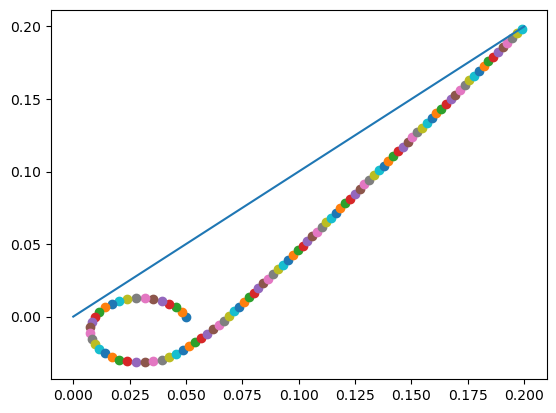

Total reward after following the policy: -2185.9098782779015


In [98]:
start_wp = [0, 0]
tgt_wp = [0.2, 0.2]
asv_psn = [0.00, 0.05]
asv_hdg = 340
env = ShipEnv(start_wp, tgt_wp, asv_psn, asv_hdg)

# Run the deterministic policy
state = env.reset(asv_psn, asv_hdg)
done = False
total_reward = 0
plt.plot([start_wp[1], tgt_wp[1]], [start_wp[0], tgt_wp[0]])
# while not done:
for i in range(100):
    # Get the current heading, bearing to target, and distance to target
    heading, bearing_to_target, distance_to_target, lat, lon = state
    # Determine the action based on the difference between bearing to tgt and heading
    
    if bearing_to_target < heading - 1:
        action = 0  # Turn left
    elif bearing_to_target > heading + 1:
        action = 2  # Turn right
    else:
        action = 1  # Maintain heading
    # Take the action in the environment
    next_state, reward, done, _ = env.step(action)
    total_reward += reward
    state = next_state
    plt.scatter(lon, lat)
    # print(f"State: {state}, Reward: {reward}, Done: {done}")
    # time.sleep(1)
plt.show()
print(f"Total reward after following the policy: {total_reward}")

In [31]:
# Example usage
start_wp = [0, 0]
tgt_wp = [0.2, -0.1]
asv_psn = [0.01, -0.01]
asv_hdg = 300

env = ShipEnv(start_wp, tgt_wp, asv_psn, asv_hdg)

state = env.reset()
done = False

while not done:
    action = env.action_space.sample()  # Random action for testing
    state, reward, done, _ = env.step(action)
    print(f"State: {state}, Reward: {reward}, Done: {done}")

State: [333.43499537 333.43499537  13.19214363], Reward: -13.192143633381287, Done: False
State: [333.43499537 333.43499537  12.95881028], Reward: -12.958810285953478, Done: False
State: [334.43499537 333.41666043  12.72551311], Reward: -12.743848048015408, Done: False
State: [334.43499537 333.39764067  12.49221728], Reward: -12.529571976145812, Done: False
State: [334.43499537 333.377897    12.25892287], Reward: -12.316021237275773, Done: False
State: [335.43499537 333.33799206  12.02574276], Reward: -12.122746067316937, Done: False
State: [334.43499537 333.31628735  11.79245297], Reward: -11.911160981442203, Done: False
State: [333.43499537 333.31389111  11.55912006], Reward: -11.680224314751227, Done: False
State: [334.43499537 333.29079575  11.32583222], Reward: -11.47003183509215, Done: False
State: [333.43499537 333.28776248  11.09249952], Reward: -11.239732405807988, Done: False
State: [332.43499537 333.30608537  10.85919247], Reward: -10.98810245732536, Done: False
State: [332.

KeyboardInterrupt: 

In [91]:
np.sin(10)

-0.5440211108893698

In [21]:
2.19e-01

0.219